# pandas

Пакет для статистической обработки данных, по функциональности близкий к R.

Ноутбук сделан на основе

http://www.inp.nsk.su/~grozin/python/pandas.html

http://pandas.pydata.org/pandas-docs/stable/10min.html

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

## Тип данных Series

Одномерный набор данных. Отсутствующий данные записываются как `np.nan` (например, в этот день термометр сломался или метеоролог был пьян). При вычислении среднего и других операций соответствующие функции не учитывают отсутствующие значения.

In [2]:
l = [1, 3, 5, np.nan, 6, 8]
s = pd.Series(l)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Основная информация о наборе данных: количество записей, среднее, стандартное отклонение, минимум, нижний квартиль, медиана, верхний квартиль, максимум, а так же тип данных.

In [3]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

В данном примере обычная индексация.

In [4]:
s[2]

5.0

In [5]:
s[2] = 7
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
s[2:5]

2    7.0
3    NaN
4    6.0
dtype: float64

In [7]:
s1 = s[1:]
s1

1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [8]:
s2 = s[:-1]
s2

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
dtype: float64

В сумме `s1+s2` складываются данные с одинаковыми индексами. Поскольку в `s1` нет данного и индексом 0, а в `s2` - с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [9]:
s1 + s2

0     NaN
1     6.0
2    14.0
3     NaN
4    12.0
5     NaN
dtype: float64

К наборам данных можно применять функции из `numpy`.

In [10]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

При создании набора данных `s` мы не указали, что будет играть роль индекса. По умолчанию это последовательность неотрицательных целых чисел 0, 1, 2, ...

In [11]:
s.index

RangeIndex(start=0, stop=6, step=1)

Но можно создавать наборы данных с индексом, заданным списком.

In [12]:
i = list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [13]:
s = pd.Series(l, index=i)
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [14]:
s['c']

5.0

Если индекс - строка, то вместо `s['c']` можно писать `s.c`.

In [15]:
s.c

5.0

Набор данных можно создать из словаря.

In [16]:
s = pd.Series({'a':1, 'b':2, 'c':0})
s

a    1
b    2
c    0
dtype: int64

Можно отсортировать набор данных.

In [17]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат (или времён измерения и т.д.).

In [18]:
d = pd.date_range('20160101', periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [19]:
s = pd.Series(sps.norm.rvs(size=10), index=d)
s

2016-01-01    1.290778
2016-01-02   -1.058218
2016-01-03    0.823173
2016-01-04    0.882960
2016-01-05    0.103799
2016-01-06    0.666546
2016-01-07    0.567902
2016-01-08    0.409835
2016-01-09    0.652040
2016-01-10   -0.281629
Freq: D, dtype: float64

Операции сравнения возвращают наборы булевых данных.

In [20]:
s > 0

2016-01-01     True
2016-01-02    False
2016-01-03     True
2016-01-04     True
2016-01-05     True
2016-01-06     True
2016-01-07     True
2016-01-08     True
2016-01-09     True
2016-01-10    False
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть `True`.

In [21]:
s[s > 0]

2016-01-01    1.290778
2016-01-03    0.823173
2016-01-04    0.882960
2016-01-05    0.103799
2016-01-06    0.666546
2016-01-07    0.567902
2016-01-08    0.409835
2016-01-09    0.652040
dtype: float64

Кумулятивные максимумы - от первого элемента до текущего.

In [22]:
s.cummax()

2016-01-01    1.290778
2016-01-02    1.290778
2016-01-03    1.290778
2016-01-04    1.290778
2016-01-05    1.290778
2016-01-06    1.290778
2016-01-07    1.290778
2016-01-08    1.290778
2016-01-09    1.290778
2016-01-10    1.290778
Freq: D, dtype: float64

Кумулятивные суммы.

In [23]:
s = s.cumsum()
s

2016-01-01    1.290778
2016-01-02    0.232560
2016-01-03    1.055733
2016-01-04    1.938693
2016-01-05    2.042492
2016-01-06    2.709038
2016-01-07    3.276940
2016-01-08    3.686775
2016-01-09    4.338815
2016-01-10    4.057186
Freq: D, dtype: float64

Построим график.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

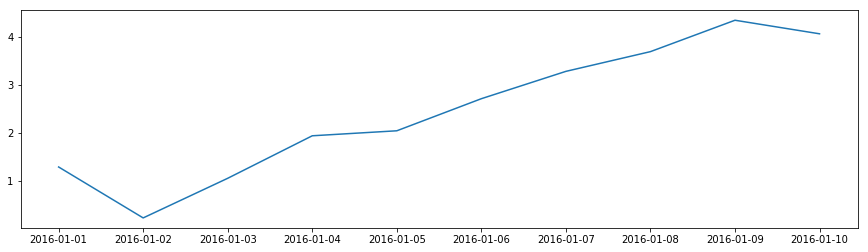

In [25]:
plt.figure(figsize=(15, 4))
plt.plot(s)
plt.show()

## Тип данных DataFrame

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [26]:
d = {'one': pd.Series(range(6), index=list('abcdef')),
     'two': pd.Series(range(7), index=list('abcdefg')),
     'three': pd.Series(sps.norm.rvs(size=7), index=list('abcdefg'))}
df = pd.DataFrame(d)
df

,one,three,two
a,0.0,1.118326,0
b,1.0,0.262201,1
c,2.0,0.564318,2
d,3.0,1.122311,3
e,4.0,-1.384203,4
f,5.0,-0.017037,5
g,NaN,0.967814,6


Таблица с несколькими разными типами данных

In [27]:
df2 = pd.DataFrame({ 'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1,index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [28]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Данные

Вернемся к первой таблице и посмотрим на ее начало и конец

In [29]:
df.head()

,one,three,two
a,0.0,1.118326,0
b,1.0,0.262201,1
c,2.0,0.564318,2
d,3.0,1.122311,3
e,4.0,-1.384203,4


In [30]:
df.tail(3)

,one,three,two
e,4.0,-1.384203,4
f,5.0,-0.017037,5
g,NaN,0.967814,6


Индексы

In [31]:
df.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

Названия колонок

In [32]:
df.columns

Index(['one', 'three', 'two'], dtype='object')

Получение обычной матрицы данных

In [33]:
df.values

array([[ 0.        ,  1.11832559,  0.        ],
       [ 1.        ,  0.26220113,  1.        ],
       [ 2.        ,  0.56431785,  2.        ],
       [ 3.        ,  1.12231121,  3.        ],
       [ 4.        , -1.3842034 ,  4.        ],
       [ 5.        , -0.01703742,  5.        ],
       [        nan,  0.96781391,  6.        ]])

Описательные статистики

In [34]:
df.describe()

,one,three,two
count,6.000000,7.000000,7.000000
mean,2.500000,0.376247,3.000000
std,1.870829,0.890644,2.160247
min,0.000000,-1.384203,0.000000
25%,1.250000,0.122582,1.500000
50%,2.500000,0.564318,3.000000
75%,3.750000,1.043070,4.500000
max,5.000000,1.122311,6.000000


Транспонирование данных

In [35]:
df.T

,a,b,c,d,e,f,g
one,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,NaN
three,1.118326,0.262201,0.564318,1.122311,-1.384203,-0.017037,0.967814
two,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000


Сортировка по столбцу

In [36]:
df.sort_values(by='three', ascending=False)

,one,three,two
d,3.0,1.122311,3
a,0.0,1.118326,0
g,NaN,0.967814,6
c,2.0,0.564318,2
b,1.0,0.262201,1
f,5.0,-0.017037,5
e,4.0,-1.384203,4


### Индексация

В отличии от обычной системы индексации в Python и Numpy, в Pandas принята иная система индексации, которая является несколько нелогичной, однако, на практике часто оказывается удобной при обработке сильно неоднородных данных.
Для написания продуктивного кода при обработке большого объема данных стоит использовать атрибуты `.at`, `.iat`, `.loc`, `.iloc`, `.ix`.

Если в качестве индекса указать имя столбца, получится одномерный набор данных.

In [37]:
df['one']

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

In [38]:
df.one

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

In [39]:
df['one']['c']

2.0

Однако если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [40]:
df['b':'d']

,one,three,two
b,1.0,0.262201,1
c,2.0,0.564318,2
d,3.0,1.122311,3


Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [41]:
df[1:3]

,one,three,two
b,1.0,0.262201,1
c,2.0,0.564318,2


Логичнее работает атрибут `loc`: первая позиция - всегда индекс строки, а вторая - столбца.

In [42]:
df.loc['b']

one      1.000000
three    0.262201
two      1.000000
Name: b, dtype: float64

In [43]:
df.loc['b', 'one']

1.0

In [44]:
df.loc['a':'b', 'one']

a    0.0
b    1.0
Name: one, dtype: float64

In [45]:
df.loc['a':'b', :]

,one,three,two
a,0.0,1.118326,0
b,1.0,0.262201,1


In [46]:
df.loc[:, 'one']

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

Атрибут `iloc` подобен `loc`: первый индекс - номер строки, второй - номер столбца. Это целые числа, конец диапазона не включается (как обычно в питоне).

In [47]:
df.iloc[2]

one      2.000000
three    0.564318
two      2.000000
Name: c, dtype: float64

In [48]:
df.iloc[1:3]

,one,three,two
b,1.0,0.262201,1
c,2.0,0.564318,2


In [49]:
df.iloc[1:3, 0:2]

,one,three
b,1.0,0.262201
c,2.0,0.564318


Булевская индексация -- выбор строк с заданным условием

In [50]:
df[df.three > 0]

,one,three,two
a,0.0,1.118326,0
b,1.0,0.262201,1
c,2.0,0.564318,2
d,3.0,1.122311,3
g,NaN,0.967814,6


### Изменение таблиц

К таблице можно добавлять новые столбцы.

In [51]:
df['4th'] = df['one'] * df['two']
df['flag'] = df['two'] > 2
df

,one,three,two,4th,flag
a,0.0,1.118326,0,0.0,False
b,1.0,0.262201,1,1.0,False
c,2.0,0.564318,2,4.0,False
d,3.0,1.122311,3,9.0,True
e,4.0,-1.384203,4,16.0,True
f,5.0,-0.017037,5,25.0,True
g,NaN,0.967814,6,NaN,True


И удалять имеющиеся.

In [52]:
del df['two']
df['foo'] = 0
df

,one,three,4th,flag,foo
a,0.0,1.118326,0.0,False,0
b,1.0,0.262201,1.0,False,0
c,2.0,0.564318,4.0,False,0
d,3.0,1.122311,9.0,True,0
e,4.0,-1.384203,16.0,True,0
f,5.0,-0.017037,25.0,True,0
g,NaN,0.967814,NaN,True,0


Изменение элемента

In [53]:
df.iat[1, 0] = -1

# Эквивалентные формы:
# df['one']['b'] = -1  <--  SettingWithCopyWarning
# df.at['b', 'one'] = -1

df

,one,three,4th,flag,foo
a,0.0,1.118326,0.0,False,0
b,-1.0,0.262201,1.0,False,0
c,2.0,0.564318,4.0,False,0
d,3.0,1.122311,9.0,True,0
e,4.0,-1.384203,16.0,True,0
f,5.0,-0.017037,25.0,True,0
g,NaN,0.967814,NaN,True,0


Добавим копию столбца `one`, в которую входят только строки до третьей.

In [54]:
df['one_tr'] = df['one'][:3]
df

,one,three,4th,flag,foo,one_tr
a,0.0,1.118326,0.0,False,0,0.0
b,-1.0,0.262201,1.0,False,0,-1.0
c,2.0,0.564318,4.0,False,0,2.0
d,3.0,1.122311,9.0,True,0,NaN
e,4.0,-1.384203,16.0,True,0,NaN
f,5.0,-0.017037,25.0,True,0,NaN
g,NaN,0.967814,NaN,True,0,NaN


### Пропуски

Удаление всех строк с пропусками

In [55]:
df.dropna(how='any')

,one,three,4th,flag,foo,one_tr
a,0.0,1.118326,0.0,False,0,0.0
b,-1.0,0.262201,1.0,False,0,-1.0
c,2.0,0.564318,4.0,False,0,2.0


Замена всех пропусков на значение

In [56]:
df.fillna(value=666)

,one,three,4th,flag,foo,one_tr
a,0.0,1.118326,0.0,False,0,0.0
b,-1.0,0.262201,1.0,False,0,-1.0
c,2.0,0.564318,4.0,False,0,2.0
d,3.0,1.122311,9.0,True,0,666.0
e,4.0,-1.384203,16.0,True,0,666.0
f,5.0,-0.017037,25.0,True,0,666.0
g,666.0,0.967814,666.0,True,0,666.0


Булевская маска пропущенных значений

In [57]:
df.isnull()

,one,three,4th,flag,foo,one_tr
a,False,False,False,False,False,False
b,False,False,False,False,False,False
c,False,False,False,False,False,False
d,False,False,False,False,False,True
e,False,False,False,False,False,True
f,False,False,False,False,False,True
g,True,False,True,False,False,True


### Простые операции

Можно объединять таблицы по вертикали и по горизонтали.

In [58]:
df2 = pd.DataFrame({'one': {'h':0, 'i':1}, 'one_tr': {'h':2}})
df2

,one,one_tr
h,0,2.0
i,1,NaN


In [59]:
pd.concat([df, df2])

,4th,flag,foo,one,one_tr,three
a,0.0,False,0.0,0.0,0.0,1.118326
b,1.0,False,0.0,-1.0,-1.0,0.262201
c,4.0,False,0.0,2.0,2.0,0.564318
d,9.0,True,0.0,3.0,NaN,1.122311
e,16.0,True,0.0,4.0,NaN,-1.384203
f,25.0,True,0.0,5.0,NaN,-0.017037
g,NaN,True,0.0,NaN,NaN,0.967814
h,NaN,NaN,NaN,0.0,2.0,NaN
i,NaN,NaN,NaN,1.0,NaN,NaN


In [60]:
df2 = pd.DataFrame({'5th': {'a':0, 'b':1}, '6th': {'c':2, 'd':3}})
df2

,5th,6th
a,0.0,NaN
b,1.0,NaN
c,NaN,2.0
d,NaN,3.0


In [61]:
pd.concat([df, df2], axis=1)

,one,three,4th,flag,foo,one_tr,5th,6th
a,0.0,1.118326,0.0,False,0,0.0,0.0,NaN
b,-1.0,0.262201,1.0,False,0,-1.0,1.0,NaN
c,2.0,0.564318,4.0,False,0,2.0,NaN,2.0
d,3.0,1.122311,9.0,True,0,NaN,NaN,3.0
e,4.0,-1.384203,16.0,True,0,NaN,NaN,NaN
f,5.0,-0.017037,25.0,True,0,NaN,NaN,NaN
g,NaN,0.967814,NaN,True,0,NaN,NaN,NaN


Создадим таблицу из массива случайных чисел.

In [62]:
df = pd.DataFrame(sps.uniform.rvs(size=(10, 4)), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.858430,0.393977,0.003261,0.501207
1,0.537500,0.708400,0.870949,0.570850
2,0.579307,0.327741,0.839412,0.483762
3,0.511177,0.486415,0.678957,0.291302
4,0.729906,0.322696,0.930687,0.797389
5,0.397648,0.931083,0.024092,0.353454
6,0.882797,0.853739,0.304124,0.654516
7,0.902996,0.499814,0.433466,0.641632
8,0.922385,0.601563,0.344310,0.989535
9,0.527774,0.953156,0.495975,0.428096


In [63]:
df2 = pd.DataFrame(sps.uniform.rvs(size=(7, 3)), columns=['A', 'B', 'C'])
df + df2

,A,B,C,D
0,1.580823,0.662549,0.305610,NaN
1,0.581642,0.797529,1.646145,NaN
2,0.879516,0.412274,1.427203,NaN
3,0.871288,0.971340,0.951542,NaN
4,1.045578,1.157625,1.894474,NaN
5,0.581126,1.883627,0.785613,NaN
6,1.126041,0.947958,0.919756,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [64]:
2 * df + 3

,A,B,C,D
0,4.716859,3.787954,3.006522,4.002413
1,4.075000,4.416799,4.741899,4.141701
2,4.158615,3.655482,4.678824,3.967524
3,4.022354,3.972829,4.357915,3.582604
4,4.459813,3.645391,4.861375,4.594778
5,3.795296,4.862166,3.048184,3.706908
6,4.765594,4.707478,3.608248,4.309032
7,4.805992,3.999627,3.866933,4.283263
8,4.844771,4.203126,3.688620,4.979069
9,4.055549,4.906312,3.991951,3.856192


In [65]:
np.sin(df)

,A,B,C,D
0,0.756817,0.383864,0.003261,0.480484
1,0.511990,0.650619,0.764941,0.540348
2,0.547444,0.321905,0.744250,0.465113
3,0.489204,0.467459,0.627982,0.287200
4,0.666800,0.317124,0.802031,0.715535
5,0.387251,0.802267,0.024090,0.346140
6,0.772518,0.753743,0.299457,0.608775
7,0.785186,0.479262,0.420019,0.598503
8,0.797044,0.565932,0.337547,0.835771
9,0.503612,0.815247,0.475890,0.415139


In [66]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.684992,0.607858,0.492523,0.571174
std,0.195938,0.241813,0.335004,0.209986
min,0.397648,0.322696,0.003261,0.291302
25%,0.530206,0.417086,0.314170,0.442012
50%,0.654607,0.550688,0.464721,0.536029
75%,0.876705,0.817404,0.799298,0.651295
max,0.922385,0.953156,0.930687,0.989535


Построим графики кумулятивных сумм

In [67]:
cs = df.cumsum()
cs

,A,B,C,D
0,0.858430,0.393977,0.003261,0.501207
1,1.395930,1.102377,0.874210,1.072057
2,1.975237,1.430117,1.713622,1.555819
3,2.486414,1.916532,2.392580,1.847121
4,3.216320,2.239228,3.323267,2.644510
5,3.613968,3.170311,3.347359,2.997964
6,4.496765,4.024050,3.651483,3.652480
7,5.399761,4.523863,4.084949,4.294112
8,6.322147,5.125427,4.429259,5.283646
9,6.849921,6.078582,4.925235,5.711742


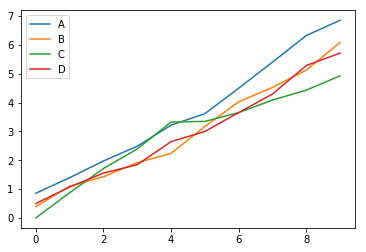

In [68]:
cs.plot()
plt.show()